In [ ]:
from pathlib import Path
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dossier principal contenant les sous-dossiers de chaque classe
DATA_DIR = Path("C:/Users/user/Downloads/DiabeticBahia")

# Récupère la liste des noms des classes (les dossiers)
CLASSES = sorted([d.name for d in DATA_DIR.iterdir() if d.is_dir()])

# Affiche les classes trouvées
CLASSES


['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']

In [ ]:
# Compte le nombre d'images pour chaque classe
image_counts = {cls: len(list((DATA_DIR / cls).glob("*"))) for cls in CLASSES}

# Transforme le dictionnaire en DataFrame pandas pour une lecture plus facile
image_counts_df = pd.DataFrame.from_dict(image_counts, orient='index', columns=["count"])

# Affiche le nombre d'images par classe
image_counts_df


,count
Healthy,525
Mild DR,370
Moderate DR,599
Proliferate DR,290
Severe DR,202


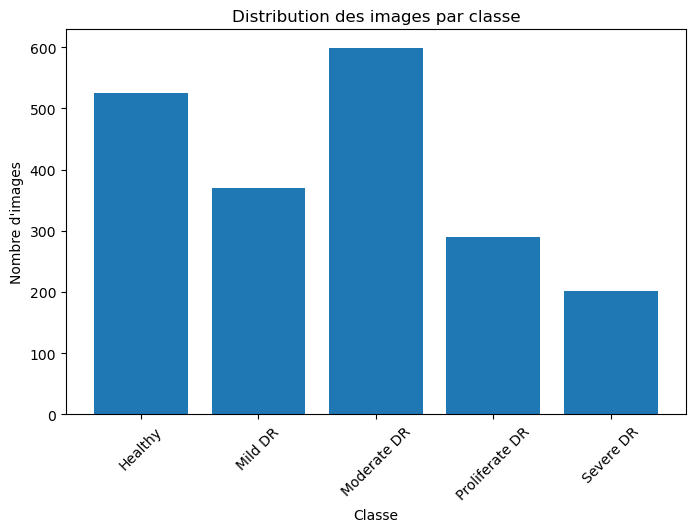

In [ ]:
plt.figure(figsize=(8, 5))  # Définir la taille de la figure
plt.bar(image_counts.keys(), image_counts.values())  # Créer un histogramme des classes
plt.title("Distribution des images par classe")  # Titre du graphique
plt.xlabel("Classe")  # Légende axe X
plt.ylabel("Nombre d'images")  # Légende axe Y
plt.xticks(rotation=45)  # Faire pivoter les labels X pour meilleure lisibilité
plt.show()  # Afficher le graphique


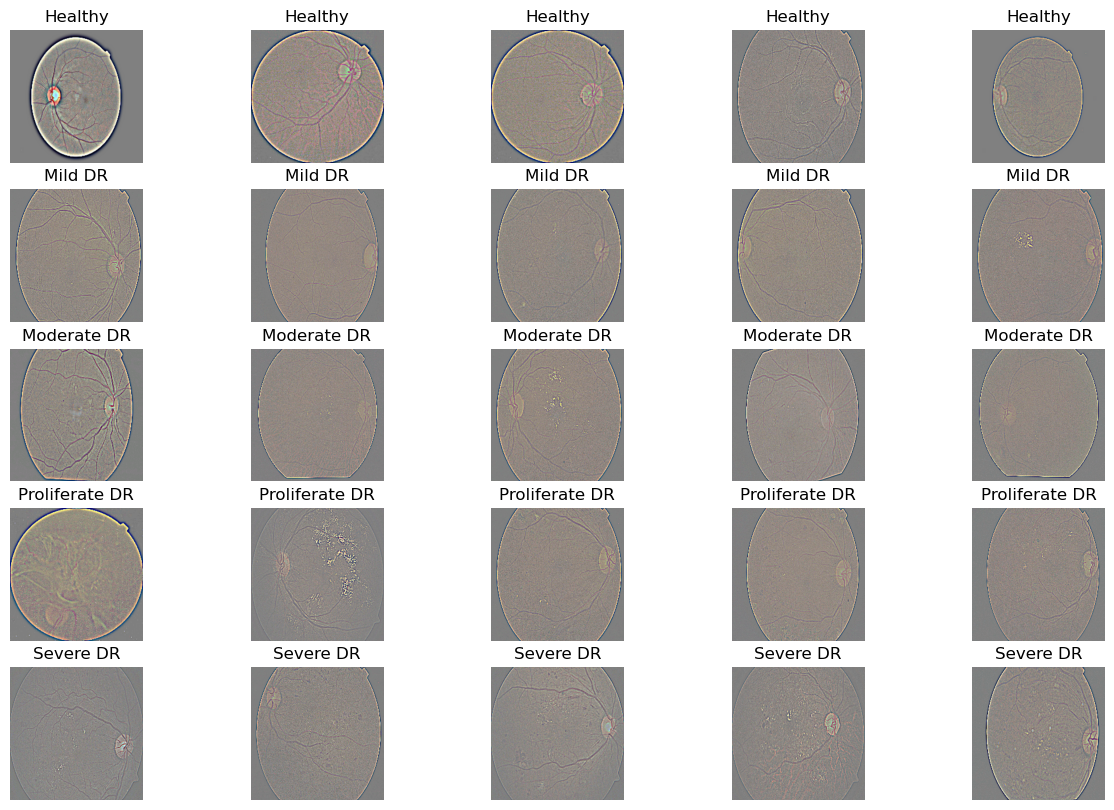

In [ ]:
import random
from PIL import Image
import matplotlib.pyplot as plt

# Fonction pour afficher des exemples d'images par classe
def show_examples_per_class(classes, data_dir, n=5):
    plt.figure(figsize=(15, 10))  # Taille globale de la figure

    # Pour chaque classe
    for idx, cls in enumerate(classes):
        # Liste des chemins d'images dans le dossier de la classe
        img_paths = list((data_dir / cls).glob("*"))
        # Sélection aléatoire de n images (ou moins si la classe a moins d'images)
        samples = random.sample(img_paths, min(n, len(img_paths)))

        # Afficher chaque image
        for i, img_path in enumerate(samples):
            img = Image.open(img_path)  # Charger l'image
            plt.subplot(len(classes), n, idx*n + i + 1)  # Position dans la grille
            plt.imshow(img)  # Afficher l'image
            plt.title(cls)  # Mettre le nom de la classe
            plt.axis("off")  # Enlever les axes

# Appel de la fonction pour afficher 5 images par classe
show_examples_per_class(CLASSES, DATA_DIR)


In [ ]:
corrupted_images = []  # Liste pour stocker les images corrompues

# Pour chaque classe
for cls in CLASSES:
    # Parcours de toutes les images dans le dossier de la classe
    for img_path in (DATA_DIR / cls).glob('*'):
        try:
            img = Image.open(img_path)  # Ouvre l'image
            img.verify()  # Vérifie que l'image est valide (non corrompue)
        except Exception:
            # Si une erreur survient, l'image est corrompue → ajouter à la liste
            corrupted_images.append(str(img_path))

# Affiche toutes les images corrompues trouvées
corrupted_images


[]

In [ ]:
sizes = []  # Liste pour stocker les dimensions des images

# Parcours de chaque classe
for cls in CLASSES:
    for img_path in (DATA_DIR / cls).glob("*"):  # Parcours toutes les images
        try:
            img = Image.open(img_path)  # Ouvre l'image
            # Ajoute un dictionnaire avec la classe, la largeur et la hauteur
            sizes.append({"class": cls, "width": img.width, "height": img.height})
        except:
            pass  # Ignore les images corrompues

# Convertit la liste en DataFrame pour une analyse facile
sizes_df = pd.DataFrame(sizes)

# Affiche les 5 premières lignes
sizes_df.head()


,class,width,height
0,Healthy,256,256
1,Healthy,256,256
2,Healthy,256,256
3,Healthy,256,256
4,Healthy,256,256


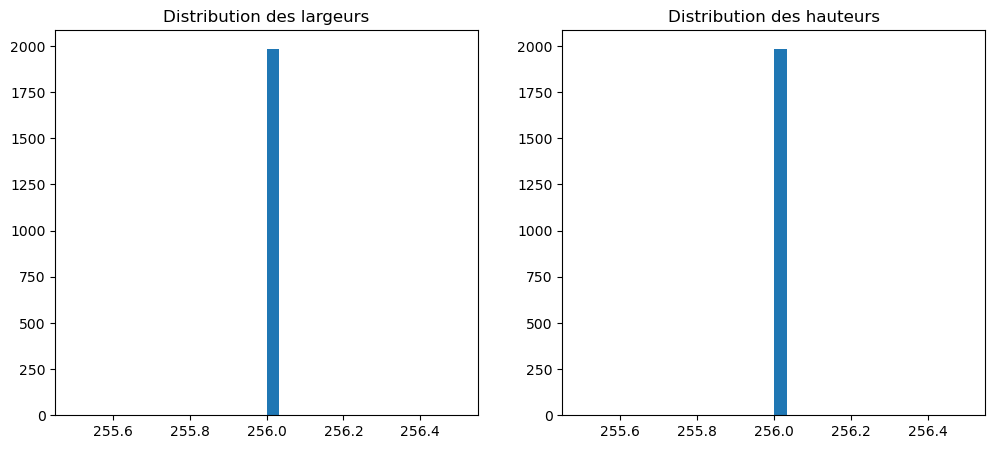

In [ ]:
plt.figure(figsize=(12, 5))  # Taille de la figure globale

# Histogramme des largeurs
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er graphique
plt.hist(sizes_df["width"], bins=30)  # Histogramme des largeurs avec 30 intervalles
plt.title("Distribution des largeurs")  # Titre du graphique

# Histogramme des hauteurs
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2ème graphique
plt.hist(sizes_df["height"], bins=30)  # Histogramme des hauteurs
plt.title("Distribution des hauteurs")  # Titre du graphique

plt.show()  # Afficher les deux histogrammes


In [ ]:
import cv2
import numpy as np
import pandas as pd

# Fonction pour calculer le "score de bruit" d'une image
def compute_noise_score(img_path):
    img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)  # Lire l'image en niveaux de gris
    if img is None:  # Si l'image est illisible ou corrompue
        return None
    return np.var(img)  # Variance des pixels → plus la variance est haute, plus l'image est "bruyante"

noise_scores = []  # Liste pour stocker les scores

# Pour chaque classe
for cls in CLASSES:
    for img_path in (DATA_DIR / cls).glob("*"):  # Parcours de toutes les images
        score = compute_noise_score(img_path)  # Calcul du score
        if score is not None:  # Ignorer les images corrompues
            noise_scores.append({"class": cls, "noise_score": score})

# Convertir en DataFrame pour analyse facile
noise_df = pd.DataFrame(noise_scores)

# Afficher les 5 premiers résultats
noise_df.head()


,class,noise_score
0,Healthy,580.673016
1,Healthy,506.515886
2,Healthy,158.063444
3,Healthy,527.256184
4,Healthy,532.312171


<Figure size 1000x500 with 0 Axes>

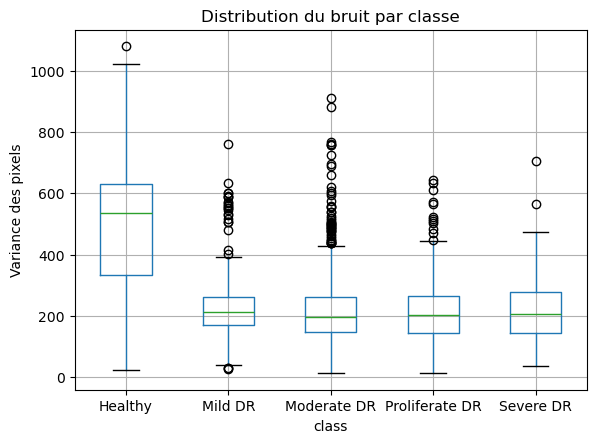

In [ ]:
plt.figure(figsize=(10, 5))  # Taille de la figure

# Boxplot de la variance des pixels (bruit) par classe
noise_df.boxplot(by="class", column="noise_score")

plt.title("Distribution du bruit par classe")  # Titre principal du graphique
plt.suptitle("")  # Supprime le titre par défaut ajouté par pandas
plt.ylabel("Variance des pixels")  # Légende axe Y

plt.show()  # Affiche le graphique


In [ ]:
from pathlib import Path       # Pour gérer facilement les chemins de fichiers/dossiers
from PIL import Image          # Pour ouvrir et manipuler les images
import os                      # Pour opérations système (création dossiers, chemins)
import numpy as np             # Pour calculs numériques et manipulation de tableaux
import shutil                  # Pour copier, déplacer ou supprimer des fichiers/dossiers
from sklearn.model_selection import train_test_split  # Pour séparer dataset en train/val/test
import tensorflow as tf        # Bibliothèque principale Deep Learning
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Génération et augmentation d’images
from tensorflow.keras.applications.resnet50 import preprocess_input  # Prétraitement spécifique pour ResNet50


In [14]:
DATA_DIR = Path("C:/Users/user/Downloads/DiabeticBahia")  # dataset original
PROCESSED_DIR = Path("C:/Users/user/Downloads/DiabeticBahia_processed_2")  # dossier final
PROCESSED_DIR.mkdir(exist_ok=True)
CLASSES = sorted([d.name for d in DATA_DIR.iterdir() if d.is_dir()])
print("Classes :", CLASSES)

Classes : ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']


In [ ]:
corrupted_images = []  # Liste pour stocker les images corrompues

# Parcours de toutes les classes et de toutes les images
for cls in CLASSES:
    for img_path in (DATA_DIR / cls).glob("*"):
        try:
            img = Image.open(img_path)  # Ouvre l'image
            img.verify()                # Vérifie l'intégrité de l'image
        except:
            corrupted_images.append(img_path)  # Si erreur → image corrompue

# Affiche le nombre d'images corrompues détectées
print(f"Nombre d'images corrompues : {len(corrupted_images)}")

# Supprime les images corrompues du dataset
for img_path in corrupted_images:
    os.remove(img_path)


Nombre d'images corrompues : 0


In [ ]:
IMG_SIZE = (224, 224)  # Taille standard pour ResNet50

for cls in CLASSES:
    class_dir = PROCESSED_DIR / cls
    class_dir.mkdir(exist_ok=True, parents=True)  # Crée le dossier de la classe si nécessaire

    for img_path in (DATA_DIR / cls).glob("*"):  # Parcours toutes les images
        img = Image.open(img_path).convert("RGB")  # Convertit en 3 canaux (RGB)
        img = img.resize(IMG_SIZE)                 # Redimensionne à 224x224
        img.save(class_dir / img_path.name)       # Sauvegarde dans le dossier processed

print("Redimensionnement et normalisation done.")


Redimensionnement et normalisation done.


In [ ]:
from pathlib import Path
import shutil
import random

PROCESSED_DIR = Path("C:/Users/user/Downloads/DiabeticBahia_processed_2")  # dataset déjà nettoyé
CLASSES = sorted([d.name for d in PROCESSED_DIR.iterdir() if d.is_dir()])

#  Compter le nombre d'images par classe
class_counts = {cls: len(list((PROCESSED_DIR / cls).glob("*"))) for cls in CLASSES}
max_count = max(class_counts.values())
print("Nombre d'images par classe avant équilibrage :", class_counts)
print("Classe majoritaire a", max_count, "images")

#  Oversampling : copier des images aléatoires des classes minoritaires
for cls in CLASSES:
    cls_dir = PROCESSED_DIR / cls
    imgs = list(cls_dir.glob("*"))
    num_to_add = max_count - len(imgs)
    
    if num_to_add > 0:
        print(f"Equilibrage {cls} : ajout de {num_to_add} images")
        for i in range(num_to_add):
            img_path = random.choice(imgs)  # choisir une image aléatoire
            new_name = f"copy_{i}_{img_path.name}"
            shutil.copy(img_path, cls_dir / new_name)

#  Vérifier le résultat
class_counts_after = {cls: len(list((PROCESSED_DIR / cls).glob("*"))) for cls in CLASSES}
print("Nombre d'images par classe après équilibrage :", class_counts_after)


Nombre d'images par classe avant équilibrage : {'Healthy': 525, 'Mild DR': 370, 'Moderate DR': 599, 'Proliferate DR': 290, 'Severe DR': 202}
Classe majoritaire a 599 images
Equilibrage Healthy : ajout de 74 images
Equilibrage Mild DR : ajout de 229 images
Equilibrage Proliferate DR : ajout de 309 images
Equilibrage Severe DR : ajout de 397 images
Nombre d'images par classe après équilibrage : {'Healthy': 599, 'Mild DR': 599, 'Moderate DR': 599, 'Proliferate DR': 599, 'Severe DR': 599}


In [ ]:
from sklearn.model_selection import train_test_split
import shutil
from pathlib import Path

# Dossiers
PROCESSED_DIR = Path("C:/Users/user/Downloads/DiabeticBahia_processed_2")  # Dataset déjà traité/redimensionné
SPLIT_DIR = Path("C:/Users/user/Downloads/DiabeticBahia_split_2")
TRAIN_DIR = SPLIT_DIR / "train"
VAL_DIR = SPLIT_DIR / "val"
TEST_DIR = SPLIT_DIR / "test"

# Crée les dossiers train, val, test
for d in [TRAIN_DIR, VAL_DIR, TEST_DIR]:
    d.mkdir(parents=True, exist_ok=True)

# Liste des classes
CLASSES = sorted([d.name for d in PROCESSED_DIR.iterdir() if d.is_dir()])

# Pour chaque classe
for cls in CLASSES:
    imgs = list((PROCESSED_DIR / cls).glob("*"))  # Liste toutes les images de la classe
    
    # Split train+val (90%) / test (10%)
    train_val_imgs, test_imgs = train_test_split(imgs, test_size=0.1, random_state=42)
    
    # Split train (77.8%) / val (22.2% du train_val) → pour obtenir environ 70/20/10
    train_imgs, val_imgs = train_test_split(train_val_imgs, test_size=0.222, random_state=42)
    
    # Copier les images dans les dossiers correspondants
    for img_path in train_imgs:
        dest = TRAIN_DIR / cls
        dest.mkdir(exist_ok=True, parents=True)
        shutil.copy(img_path, dest / img_path.name)
        
    for img_path in val_imgs:
        dest = VAL_DIR / cls
        dest.mkdir(exist_ok=True, parents=True)
        shutil.copy(img_path, dest / img_path.name)
        
    for img_path in test_imgs:
        dest = TEST_DIR / cls
        dest.mkdir(exist_ok=True, parents=True)
        shutil.copy(img_path, dest / img_path.name)

print("Split train/val/test terminé")


Split train/val/test terminé 


In [ ]:
for folder in ["train", "val", "test"]:  # Pour chaque type de dataset
    print(f"{folder} :")
    for cls in CLASSES:  # Pour chaque classe
        path = SPLIT_DIR / folder / cls  # Chemin vers le dossier de la classe
        count = len(list(path.glob("*")))  # Compte le nombre d'images
        print(f"  {cls}: {count} images")  # Affiche le résultat


train :
  Healthy: 419 images
  Mild DR: 419 images
  Moderate DR: 419 images
  Proliferate DR: 419 images
  Severe DR: 419 images
val :
  Healthy: 120 images
  Mild DR: 120 images
  Moderate DR: 120 images
  Proliferate DR: 120 images
  Severe DR: 120 images
test :
  Healthy: 60 images
  Mild DR: 60 images
  Moderate DR: 60 images
  Proliferate DR: 60 images
  Severe DR: 60 images


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Générateur pour le train set (avec augmentation)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

train_generator = train_datagen.flow_from_directory(
    directory=str(SPLIT_DIR / "train"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True
)

# Générateur pour validation (sans augmentation)

val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_generator = val_datagen.flow_from_directory(
    directory=str(SPLIT_DIR / "val"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Générateur pour test (sans augmentation)
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

test_generator = test_datagen.flow_from_directory(
    directory=str(SPLIT_DIR / "test"),
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

print("Generators train/val/test prêts ")


Found 2095 images belonging to 5 classes.
Found 600 images belonging to 5 classes.
Found 300 images belonging to 5 classes.
Generators train/val/test prêts 


In [22]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Récupérer les labels du générateur (indices des classes)
y_train = train_generator.classes  

# Liste des classes : [0, 1, 2, ...]
class_labels = np.unique(y_train)

# Calcul des poids équilibrés
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=class_labels,
    y=y_train
)

# Convertir en dict {classe: poids}
class_weights_dict = {i : class_weights[i] for i in range(len(class_weights))}

print("Class Weights Calculés :")
print(class_weights_dict)


Class Weights Calculés :
{0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0)}


In [23]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Fine-tuning complet : débloquer les dernières 100 couches
for layer in base_model.layers[:-100]:
    layer.trainable = False
for layer in base_model.layers[-100:]:
    layer.trainable = True

# Ajouter le classifieur
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.5)(x)
outputs = Dense(len(CLASSES), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

#  Compiler AVANT entraînement
model.compile(optimizer=Adam(learning_rate=5e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,597,957 (90.02 MB)

 Trainable params: 22,162,181 (84.54 MB)

 Non-trainable params: 1,435,776 (5.48 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Arrêt précoce : stoppe l'entraînement si la validation loss n'améliore pas pendant 7 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Sauvegarde automatiquement le meilleur modèle basé sur la validation loss
checkpoint = ModelCheckpoint('best_model_diabetic.keras', monitor='val_loss', save_best_only=True)

# Réduction du learning rate si la validation loss stagne pendant 3 epochs
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-7, verbose=1)

# Liste des callbacks à passer à l'entraînement
callbacks = [early_stop, checkpoint, reduce_lr]

# Entraînement du modèle
history = model.fit(
    train_generator,                # Générateur d'images pour l'entraînement
    epochs=50,                       # Nombre maximum d'epochs
    validation_data=val_generator,   # Générateur pour validation
    class_weight=class_weights_dict, # Poids pour équilibrer les classes
    callbacks=callbacks              # Callbacks définis ci-dessus
)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.2802 - loss: 1.8470 - val_accuracy: 0.3917 - val_loss: 1.6462 - learning_rate: 5.0000e-06
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.4057 - loss: 1.5118 - val_accuracy: 0.4483 - val_loss: 1.3176 - learning_rate: 5.0000e-06
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.4434 - loss: 1.3644 - val_accuracy: 0.5183 - val_loss: 1.1560 - learning_rate: 5.0000e-06
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.4544 - loss: 1.3233 - val_accuracy: 0.5583 - val_loss: 1.0790 - learning_rate: 5.0000e-06
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.5012 - loss: 1.2175 - val_accuracy: 0.6067 - val_loss: 1.0318 - learning_rate: 5.0000e-06
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.5045 - loss: 1.1768 - val_accuracy: 0.6133 - val_loss: 0.9977 - learning_rate: 5.0000e-06
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 209s 3s/step - accuracy: 0.5332 

In [ ]:
# charger le meilleur modèle enregistré par ModelCheckpoint
from tensorflow.keras.models import load_model
BEST_MODEL_PATH = "best_model_diabetic.keras"
import os
if os.path.exists(BEST_MODEL_PATH):
   
    best_model = load_model(BEST_MODEL_PATH, compile=False)
    print("Loaded best model from checkpoint:", BEST_MODEL_PATH)
else:
    best_model = model
    print("erreur")

Loaded best model from checkpoint: best_model_diabetic.keras


In [ ]:
# Nombre d'étapes pour parcourir tout le test set
test_steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Évaluation du modèle sur le test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_steps)

# Affichage des résultats
print(f"Test loss: {test_loss:.4f} - Test accuracy: {test_acc:.4f}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.8367 - loss: 0.5566
Test loss: 0.5566 - Test accuracy: 0.8367


=== Classification Report ===
                precision    recall  f1-score   support

       Healthy     0.9206    0.9667    0.9431        60
       Mild DR     0.7794    0.8833    0.8281        60
   Moderate DR     0.7955    0.5833    0.6731        60
Proliferate DR     0.8909    0.8167    0.8522        60
     Severe DR     0.8000    0.9333    0.8615        60

      accuracy                         0.8367       300
     macro avg     0.8373    0.8367    0.8316       300
  weighted avg     0.8373    0.8367    0.8316       300



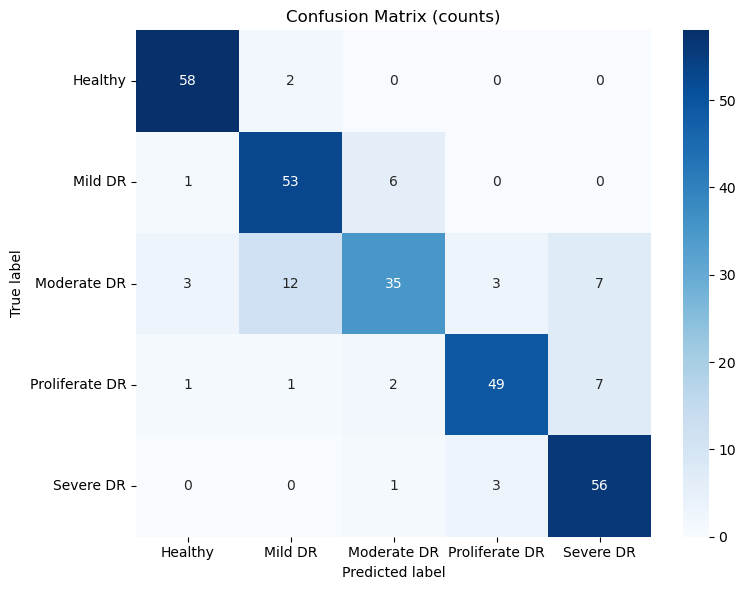

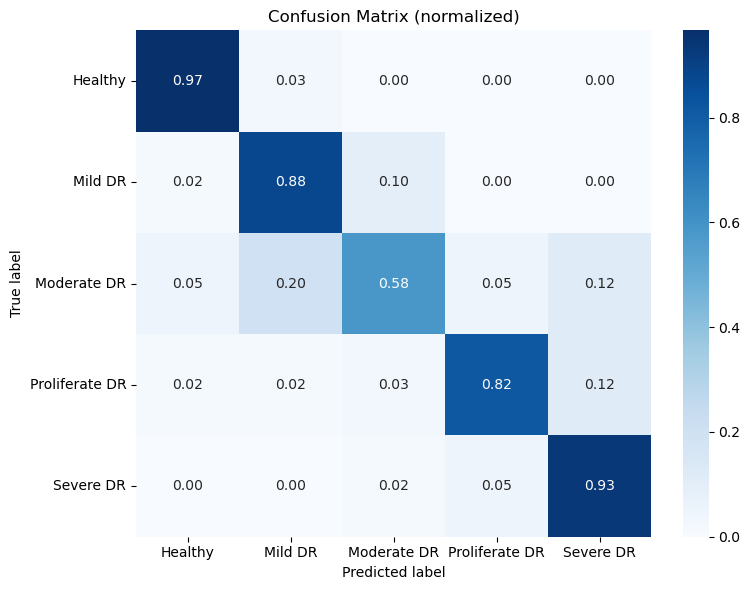

In [ ]:
#  Classification report + confusion matrix (normalisée et non normalisée)
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=classes, digits=4))

cm = confusion_matrix(y_true, y_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # normalized per true class

# Plot raw confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.ylabel("True label"); plt.xlabel("Predicted label"); plt.title("Confusion Matrix (counts)")
plt.tight_layout()
plt.savefig("confusion_matrix_counts.png", dpi=300)
plt.show()

# Plot normalized confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm_norm, annot=True, fmt=".2f", xticklabels=classes, yticklabels=classes, cmap="Blues")
plt.ylabel("True label"); plt.xlabel("Predicted label"); plt.title("Confusion Matrix (normalized)")
plt.tight_layout()
plt.savefig("confusion_matrix_normalized.png", dpi=300)
plt.show()


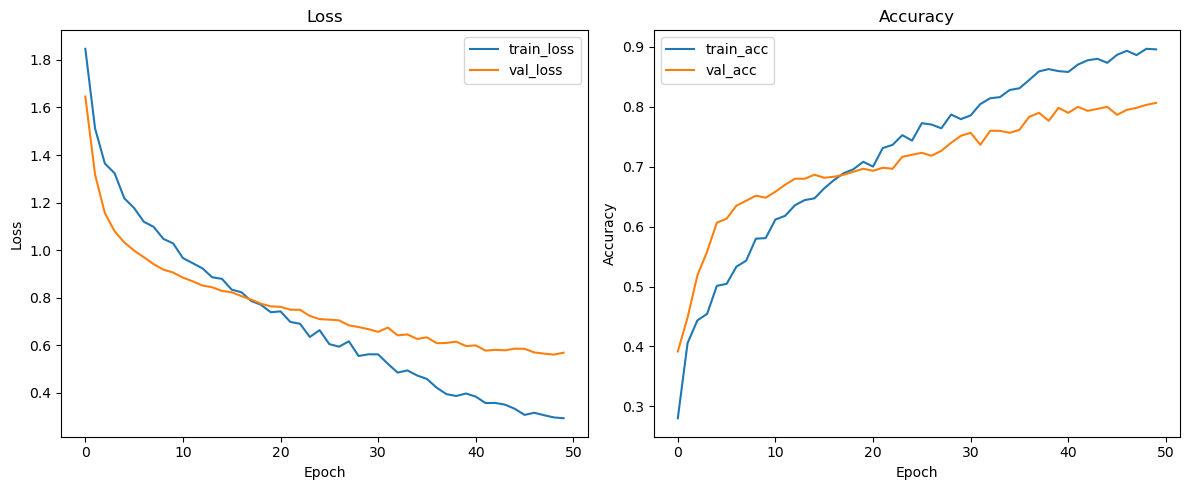

Saved training_curves.png and history.pkl


In [ ]:
#  Tracer loss & accuracy (training history), sauvegarder l'historique
import joblib
if 'history' in globals():
    h = history.history
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(h.get('loss', []), label='train_loss')
    plt.plot(h.get('val_loss', []), label='val_loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(h.get('accuracy', []), label='train_acc')
    plt.plot(h.get('val_accuracy', []), label='val_acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy')
    plt.legend()
    plt.tight_layout()
    plt.savefig("training_curves.png", dpi=300)
    plt.show()
    joblib.dump(h, "history.pkl")
    print("Saved training_curves.png and history.pkl")
else:
    print("Variable 'history' non trouvée. Si vous avez l'objet history, chargez-le pour tracer.")


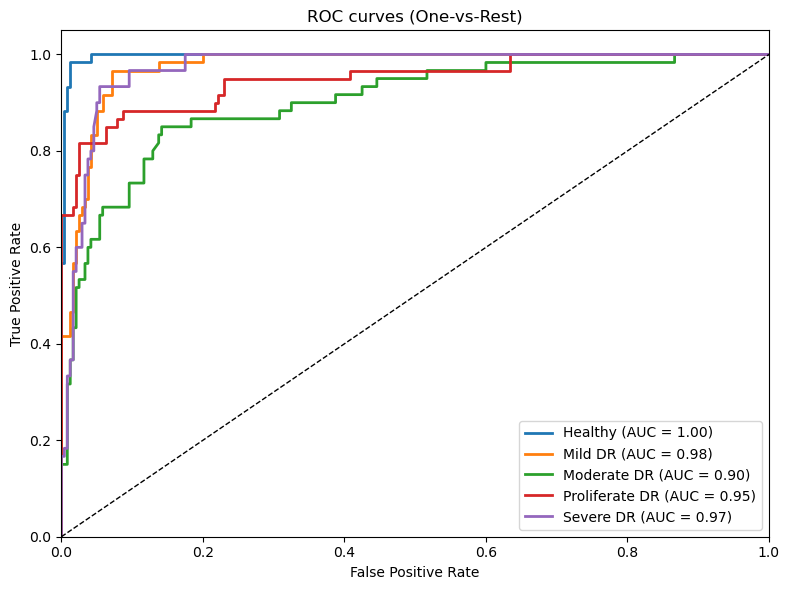

Mean AUC (macro) = 0.9588


In [ ]:
#  ROC & AUC multiclass (one-vs-rest)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

n_classes = len(classes)
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

fpr = dict(); tpr = dict(); roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8,6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f"{classes[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0,1],[0,1], 'k--', lw=1)
plt.xlim([0.0,1.0]); plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_multiclass.png", dpi=300)
plt.show()

mean_auc = np.mean(list(roc_auc.values()))
print(f"Mean AUC (macro) = {mean_auc:.4f}")
